In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_excel('Copy of Logistics Role Test Data.xlsx')
df.head()

,Agrodealer_id,Date,Agrodealer Referrals,County,Ward
0,473,2021-03-08,0,Siaya,Ukwala
1,473,2021-03-09,0,Siaya,Ukwala
2,473,2021-03-10,0,Siaya,Ukwala
3,473,2021-03-11,1,Siaya,Ukwala
4,473,2021-03-12,0,Siaya,Ukwala


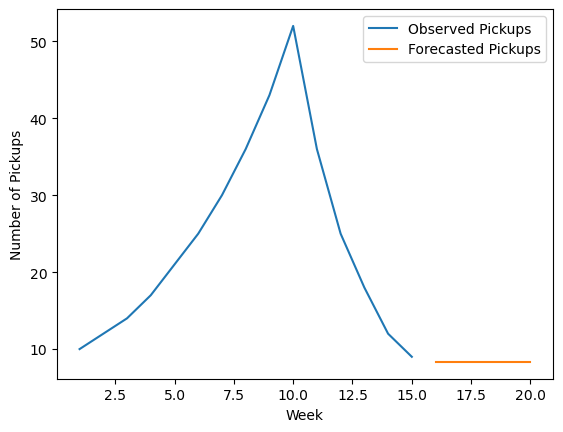

In [5]:
agrodealers = 250
weeks = 15
initial_pickups = 10
growth_rate = 0.20
decline_rate = 0.30

data = {'Week': np.arange(1, weeks + 1)}
df = pd.DataFrame(data)

# Calculate the number of pickups for each week
df['Pickups'] = np.round(initial_pickups * (1 + growth_rate) ** np.clip(df['Week'] - 1, 0, 9) * (1 - decline_rate) ** np.clip(df['Week'] - 10, 0, 5))

# Assuming 60% of pickups take Maize, topdressing, and planting fertiliser, and 40% take just maize and planting
df['Maize_Topdressing_Planting'] = np.round(0.6 * df['Pickups'])
df['Maize_Planting'] = df['Pickups'] - df['Maize_Topdressing_Planting']

# Assuming wholesale costs
maize_cost = 1200
topdressing_cost = 4500
planting_cost = 6000

# Calculate the cost for each type of pickup
df['Maize_Topdressing_Planting_Cost'] = df['Maize_Topdressing_Planting'] * (maize_cost + topdressing_cost + planting_cost)
df['Maize_Planting_Cost'] = df['Maize_Planting'] * (maize_cost + planting_cost)

# ARIMA modeling
model = ARIMA(df['Pickups'], order=(0, 1, 1))
fit_model = model.fit()

# Forecast future pickups
future_weeks = 5  # Number of weeks to forecast
forecast = fit_model.forecast(steps=future_weeks)

plt.plot(df['Week'], df['Pickups'], label='Observed Pickups')
plt.plot(np.arange(weeks + 1, weeks + 1 + future_weeks), forecast, label='Forecasted Pickups')
plt.xlabel('Week')
plt.ylabel('Number of Pickups')
plt.legend()
plt.show()